In [ ]:
import numpy as np,pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Advertising.csv")
data.head()

FileNotFoundError: ignored

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
#Collecting X and  Y
X = data['TV'].values

NameError: ignored

In [ ]:
Y = data['sales'].values

In [ ]:
#calculating mean (X) and mean(Y)
mean_x = np.mean(X)
print(mean_x)
mean_y = np.mean(Y)
print(mean_y)

147.0425
14.0225


In [ ]:
#OLS -Ordinary Least Squares
n = len(X)
#to calculate b1 and b0 y = b1x + b0
numer = 0
denom = 0
for i in range(n):
  numer += (X[i]-mean_x)*(Y[i]-mean_y)
  denom += (X[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1*mean_x)
print(b1)
print(b0)

0.04753664043301969
7.032593549127704


In [ ]:
print("The linear model is:Y = {:.5}+{:.3}X".format(b0,b1))

The linear model is:Y = 7.0326+0.0475X


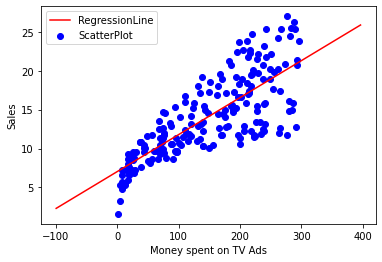

In [ ]:
#plotting values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
#calculating line values
x = np.linspace(min_x,max_x,1000)
y = b1*x + b0
#Plotting line
plt.plot(x,y,color= 'red',label = "RegressionLine")
plt.scatter(X,Y,c="Blue",label = "ScatterPlot")
plt.xlabel("Money spent on TV Ads")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()


In [ ]:
y_pred = b0 + b1*X[2]
y_pred

7.8502237645756425

In [ ]:
X[2]

17.2

In [ ]:
#cal R^2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
  y_pred = b0 + b1*X[i] # for predicted values
  ss_tot +=  (Y[i] - mean_y) **2
  ss_res += (Y[i]-y_pred)**2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.6118750508500708


In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction = reg.predict(X)

In [ ]:
r2 = reg.score(X,y)
print("R2 Score",r2)

R2 Score 0.611875050850071
